In [1]:
import warnings
warnings.filterwarnings('ignore')

# IMPORT LIBRARYS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# IMPORT FILES

In [3]:
file_path = 'movies.dat'
encodings_to_try = ['ISO-8859-1', 'ISO-8859-15', 'latin1']

for encoding in encodings_to_try:
    try:
        movie_df = pd.read_csv(file_path, sep='::', engine='python', encoding=encoding, header=None)
        movie_df.columns =['MovieIDs','MovieName','Category']
        break
    except UnicodeDecodeError:
        print(f"Failed to read using encoding: {encoding}")
print(movie_df.head())


   MovieIDs                           MovieName                      Category
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


In [4]:
rating_df = pd.read_csv('ratings.dat', sep = '::', engine='python')
rating_df.columns =['ID','MovieID','Ratings','TimeStamp']
rating_df

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [5]:
user_df = pd.read_csv('users.dat', sep = '::', engine='python')
user_df.columns =['UserID','Gender','Age','Occupation','Zip-code']
user_df

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


# CLEANING AND PRE-PROCESSING

In [6]:
user_df.rename(columns={'UserID': 'ID'}, inplace=True)

In [7]:
data = pd.merge(rating_df, user_df, on='ID', how='inner')
data.head()

,ID,MovieID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,2,1357,5,978298709,M,56,16,70072
1,2,3068,4,978299000,M,56,16,70072
2,2,1537,4,978299620,M,56,16,70072
3,2,647,3,978299351,M,56,16,70072
4,2,2194,4,978299297,M,56,16,70072


In [8]:
data = data.replace(['M','F'],[1,0])

In [9]:
data.rename(columns={'Gender': 'Sex_is_male'}, inplace=True)
data.head()

,ID,MovieID,Ratings,TimeStamp,Sex_is_male,Age,Occupation,Zip-code
0,2,1357,5,978298709,1,56,16,70072
1,2,3068,4,978299000,1,56,16,70072
2,2,1537,4,978299620,1,56,16,70072
3,2,647,3,978299351,1,56,16,70072
4,2,2194,4,978299297,1,56,16,70072


In [10]:
data.shape

(1000156, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000156 entries, 0 to 1000155
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   ID           1000156 non-null  int64 
 1   MovieID      1000156 non-null  int64 
 2   Ratings      1000156 non-null  int64 
 3   TimeStamp    1000156 non-null  int64 
 4   Sex_is_male  1000156 non-null  int64 
 5   Age          1000156 non-null  int64 
 6   Occupation   1000156 non-null  int64 
 7   Zip-code     1000156 non-null  object
dtypes: int64(7), object(1)
memory usage: 68.7+ MB


In [12]:
data.isna().sum()

ID             0
MovieID        0
Ratings        0
TimeStamp      0
Sex_is_male    0
Age            0
Occupation     0
Zip-code       0
dtype: int64

# EXPLORATORY DATA ANALYTICS

In [13]:
data.describe()

,ID,MovieID,Ratings,TimeStamp,Sex_is_male,Age,Occupation
count,1.000156e+06,1.000156e+06,1.000156e+06,1.000156e+06,1.000156e+06,1.000156e+06,1.000156e+06
mean,3.024673e+03,1.865556e+03,3.581532e+00,9.722434e+08,7.536514e-01,2.973984e+01,8.036034e+00
std,1.728318e+03,1.096047e+03,1.117112e+00,1.215280e+07,4.308841e-01,1.175043e+01,6.531493e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1.000000e+00,2.500000e+01,2.000000e+00
50%,3.071000e+03,1.835000e+03,4.000000e+00,9.730179e+08,1.000000e+00,2.500000e+01,7.000000e+00
75%,4.477000e+03,2.770000e+03,4.000000e+00,9.752208e+08,1.000000e+00,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,1.000000e+00,5.600000e+01,2.000000e+01


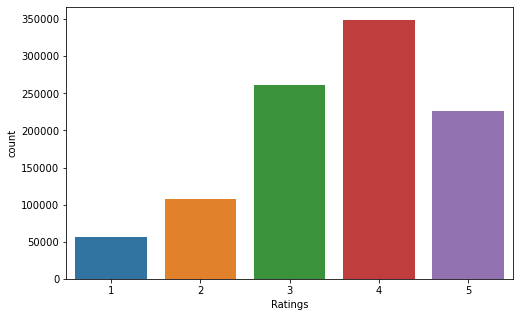

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='Ratings', data=data)
plt.show()

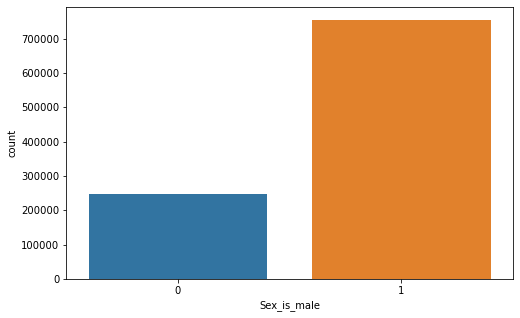

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex_is_male', data=data)
plt.show()

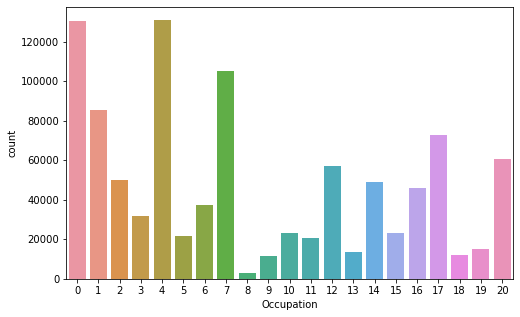

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Occupation', data=data)
plt.show()

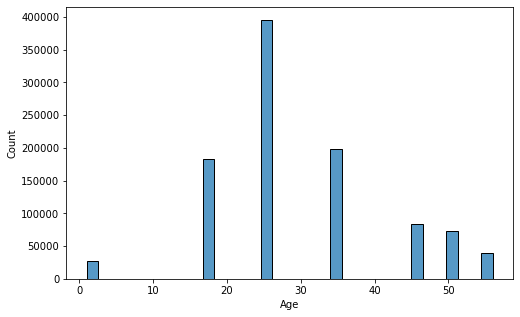

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=35)
plt.show()

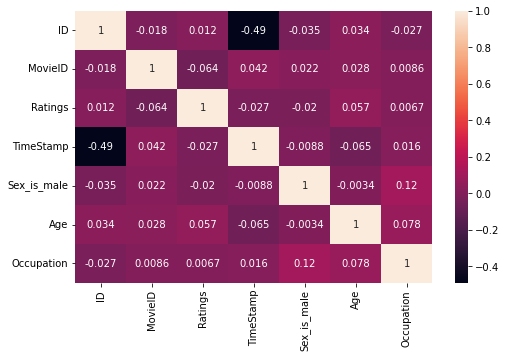

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# SPLIT THE DATASET

In [19]:
x= data[['MovieID', 'Sex_is_male', 'Age', 'Occupation']]
y = data['Ratings']
print("Shape of X = ",x.shape)
print("Shape of Y = ",y.shape)

Shape of X =  (1000156, 4)
Shape of Y =  (1000156,)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

print("Shape of X_train = ", x_train.shape)
print("Shape of X_test = ", x_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (700109, 4)
Shape of X_test =  (300047, 4)
Shape of y_train =  (700109,)
Shape of y_test =  (300047,)


# MODEL FITTING

In [21]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(x_train, y_train)
DecisionTree_score = DecisionTree.score(x_test, y_test)
DecisionTree_score

0.3398334260965782

In [22]:
KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
KNN_score = KNN.score(x_test, y_test)
KNN_score

0.33380770345979127

In [23]:
multinomial_NB = MultinomialNB()

multinomial_NB.fit(x_train, y_train)
multinomial_NB_score = multinomial_NB.score(x_test, y_test)
multinomial_NB_score

0.23254356817431934

In [24]:
score_table = pd.DataFrame({"Test":['DecisionTreeClassifier', 'KNeighborsClassifier', 'MultinomialNB'], 
              "Score":[DecisionTree_score, KNN_score, multinomial_NB_score]})
score_table

,Test,Score
0,DecisionTreeClassifier,0.339833
1,KNeighborsClassifier,0.333808
2,MultinomialNB,0.232544


# PREDICTION

In [25]:
y_pred = DecisionTree.predict(x_test)

In [27]:
prediction_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_table.head()

,Actual,Predicted
823274,4,4
397157,3,2
520349,3,3
382182,4,5
483841,4,5
